In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# seaborn es un paquete que está diseñado sobre matplotlib...
# ... que tiene gráficos lindos listos

df = pd.read_csv('../Clase_2022_06_07/titanic.csv', parse_dates=['Signing_date'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Signing_date
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1911-05-17
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1911-07-23
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1911-09-08
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1911-06-26
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1911-10-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1911-08-17
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1911-08-07
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1912-01-30
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1911-08-08


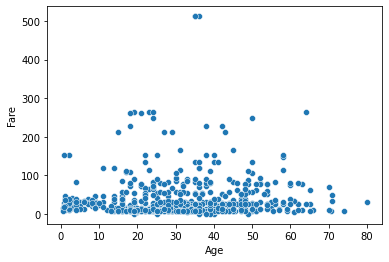

In [3]:
# Estructura de searborn: sns.nombre_del_grafico(x= 'Columna 1', y= 'Columna 2', data= df)
sns.scatterplot(x='Age', y='Fare', data=df);

<AxesSubplot:xlabel='Age', ylabel='Fare'>

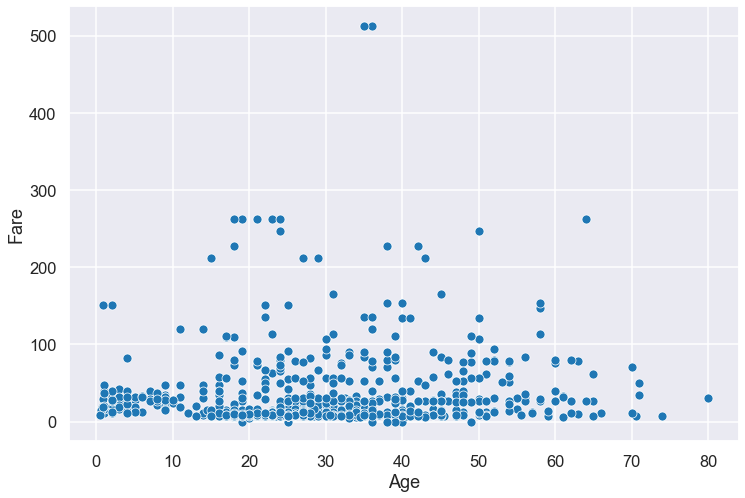

In [4]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')  # white, dark, whitegrid, darkgrid, ticks
sns.set_context('talk')  # notebook, talk, poster
sns.scatterplot(x='Age', y='Fare', data=df)
# plt.style.use('Solarize_Light2')
# plt.style.available


### Revisar
![fig1.png](fig1.png)

Seaborn, ha cambiado mucho... (están sacando interfaz, ggplot2)
Facegrid... relplot, catplot, displot...

### Relplot
Es un comando para graficar dos variables numéricas* (no categorias)...


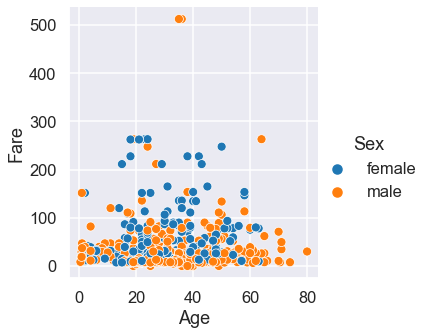

In [5]:
sns.relplot(x='Age', y='Fare', data=df, hue='Sex', hue_order=['female','male']);

<Figure size 864x576 with 0 Axes>

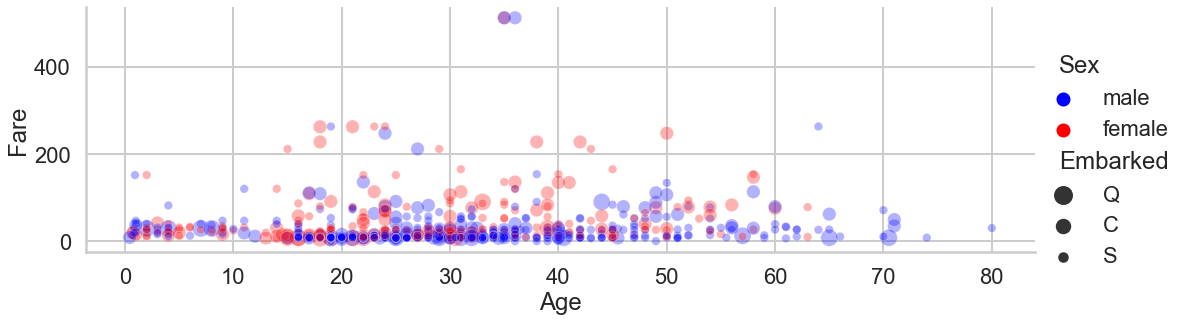

In [6]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')  # white, dark, whitegrid, darkgrid, ticks
sns.set_context('poster')  # notebook, talk, poster
hue_color = {
                'male':'b',
                'female':'r'
            }
sns.relplot(x='Age',y='Fare',data=df,hue='Sex',size='Embarked',size_order=['Q','C','S'], palette=hue_color, alpha = .3, height= 5, aspect=3);

### Linechart

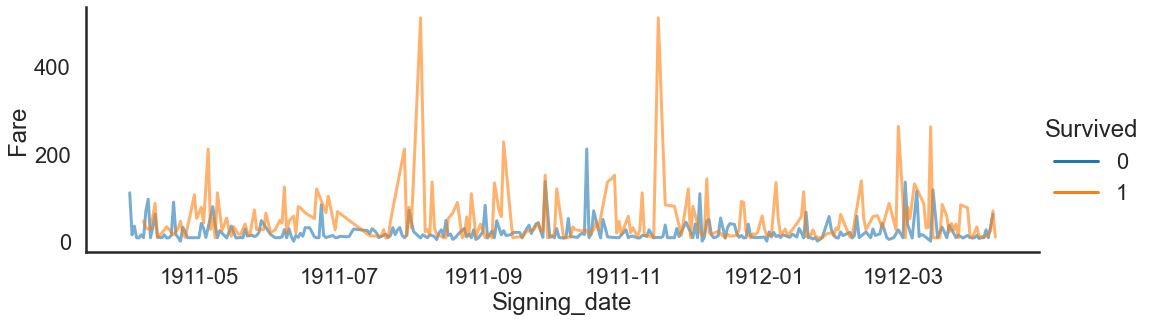

In [7]:
sns.set_style('white')
sns.relplot(x='Signing_date',y='Fare', data=df, kind = 'line', hue='Survived', estimator=np.median, height= 5, aspect=3, alpha=.6, ci=None); #ci sirve para agregar el intervalo de confianza

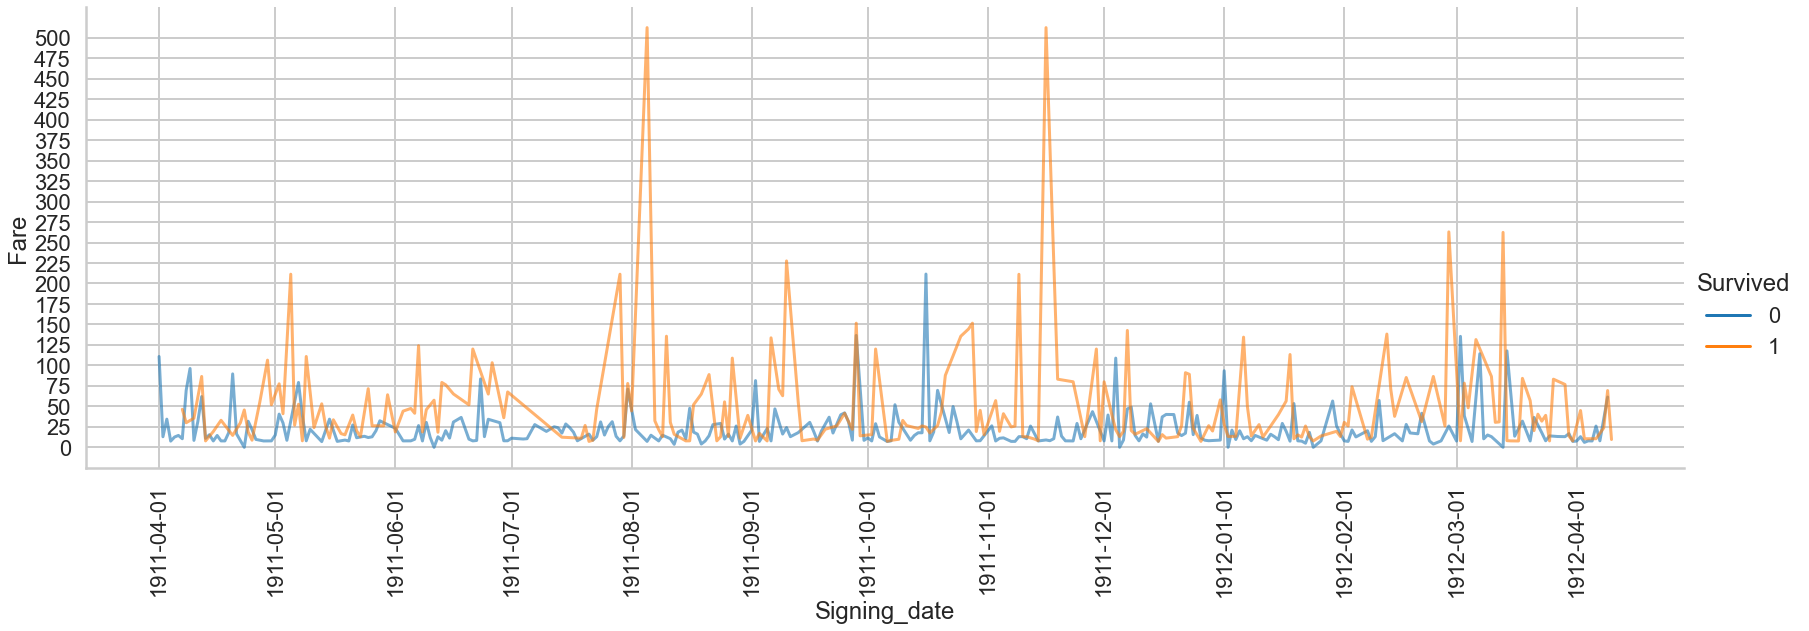

In [8]:
sns.set_style('whitegrid')
sns.relplot(x='Signing_date',y='Fare', data=df, kind = 'line', hue='Survived', estimator=np.mean,  height= 8, aspect=3, alpha=.6, ci=None); #ci sirve para agregar el intervalo de confianza
plt.xticks(pd.date_range(start = '1911-04-01', end='1912-04-01', freq='MS'), rotation=90);
plt.yticks(np.arange(0, 501, 25));


# Catplot
[Catplot doc](https://seaborn.pydata.org/generated/seaborn.catplot.html)  
Combinación de categoricas con otra cosa

In [9]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

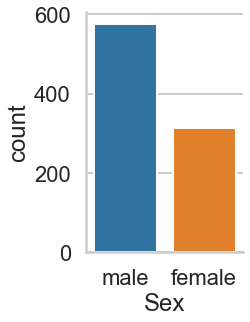

In [10]:
sns.catplot(x = 'Sex', data = df, kind='count' ,height = 5, aspect = .8);

Text(0.5, 1.0, 'Conteo de Pasajeros por Género')

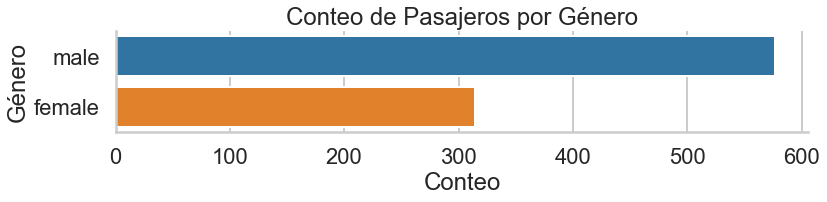

In [11]:
sns.catplot(y = 'Sex', data = df, kind='count' ,height = 3, aspect = 4);
plt.xlabel('Conteo')
plt.ylabel('Género');
plt.title('Conteo de Pasajeros por Género')

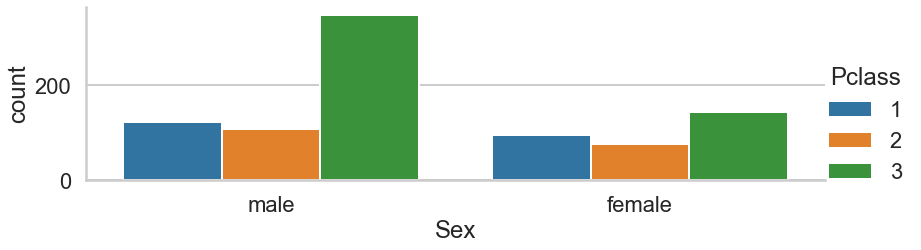

In [12]:
sns.catplot(x='Sex',data=df, kind = 'count', height=4, aspect = 3, hue='Pclass')

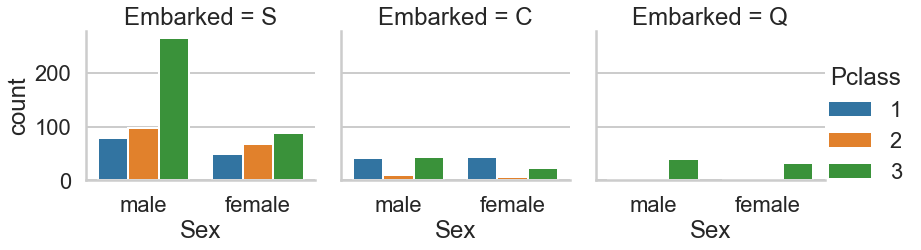

In [13]:
sns.catplot(x='Sex',data=df, kind = 'count', height=4, aspect = 1, hue='Pclass', col = 'Embarked')

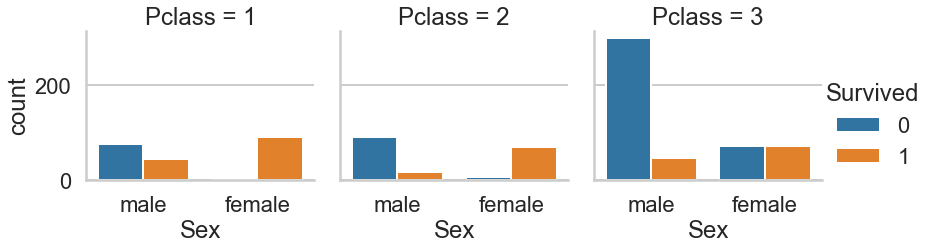

In [14]:
sns.catplot(x='Sex',data=df, kind = 'count', height=4, aspect = 1, hue='Survived', col = 'Pclass')

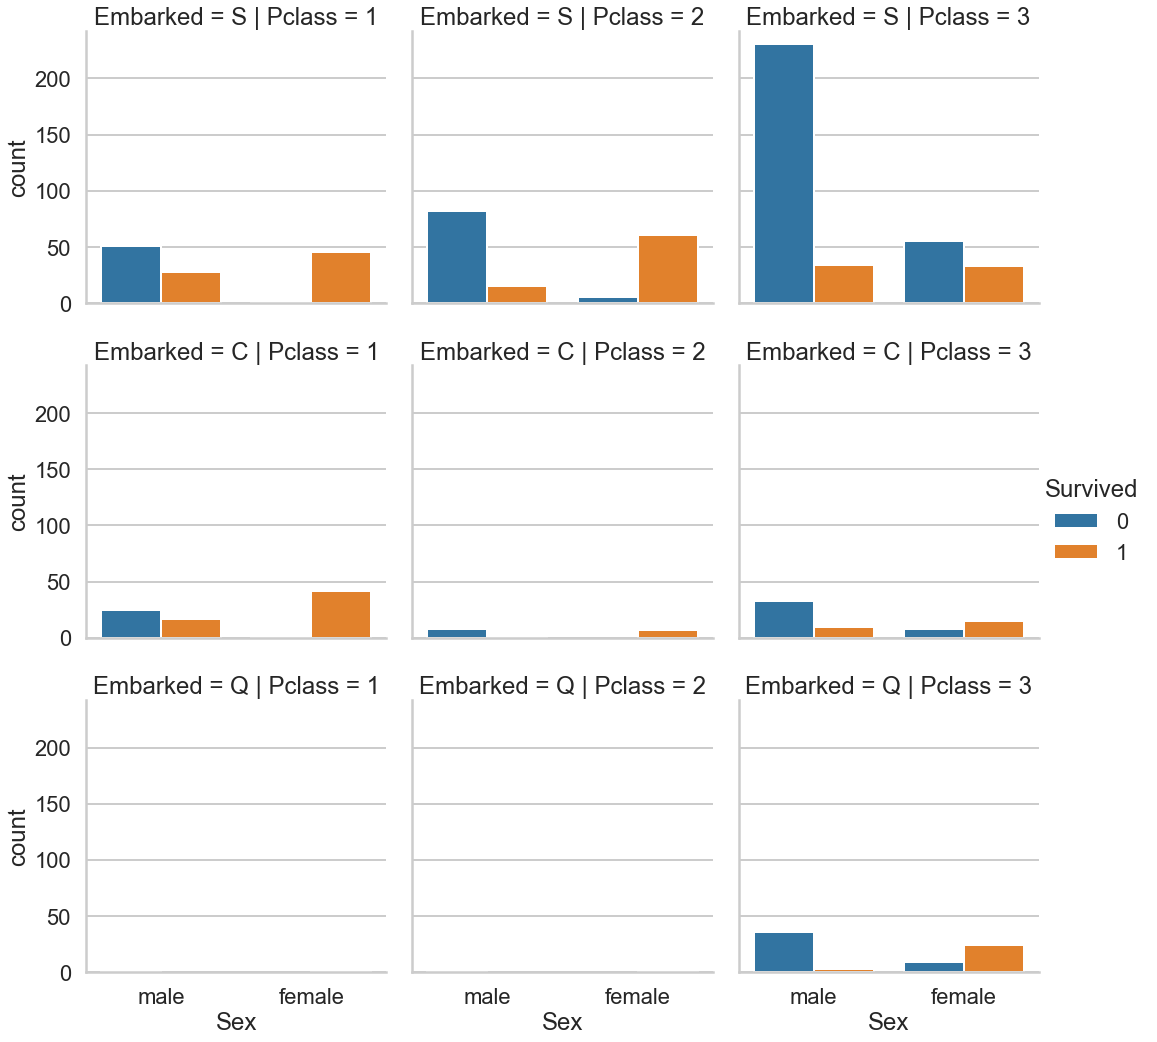

In [15]:
sns.catplot(x='Sex',data=df, kind = 'count', height=5, aspect = 1, hue='Survived', col = 'Pclass', row = 'Embarked');

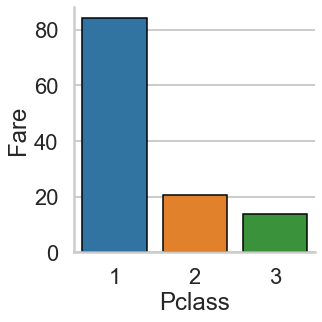

In [16]:
sns.catplot(x='Pclass', y='Fare', data=df, kind='bar', ci=None, estimator=np.mean, edgecolor='black', linewidth=1.5)


### Boxplot

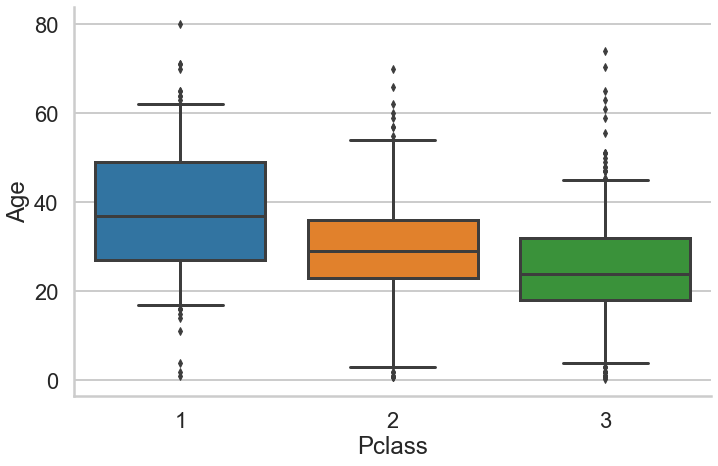

In [17]:
sns.catplot(x='Pclass', y='Age', data=df, kind='box',height=7, aspect=1.5, whis= [5, 95]);

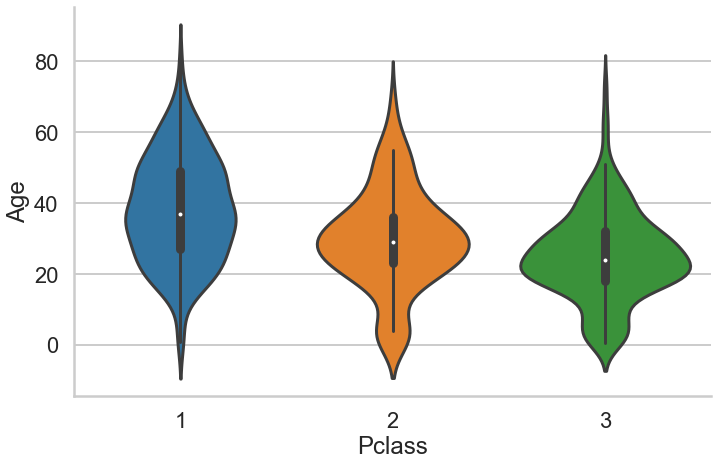

In [18]:
sns.catplot(x='Pclass', y='Age', data=df, kind='violin',height=7, aspect=1.5);

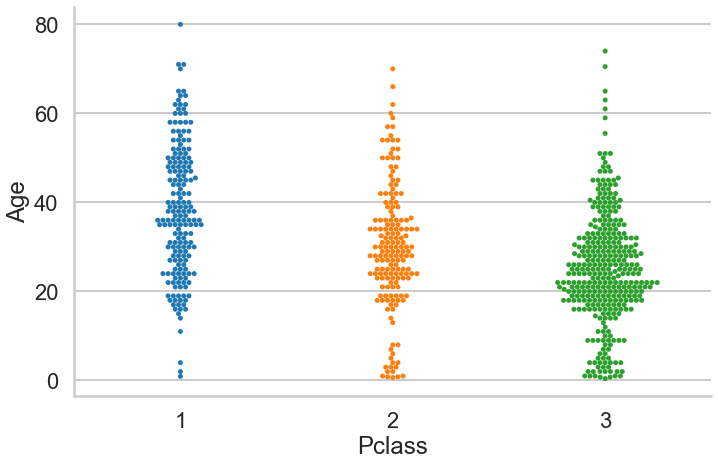

In [19]:
sns.catplot(x='Pclass', y='Age', data=df, kind='swarm',height=7, aspect=1.5);

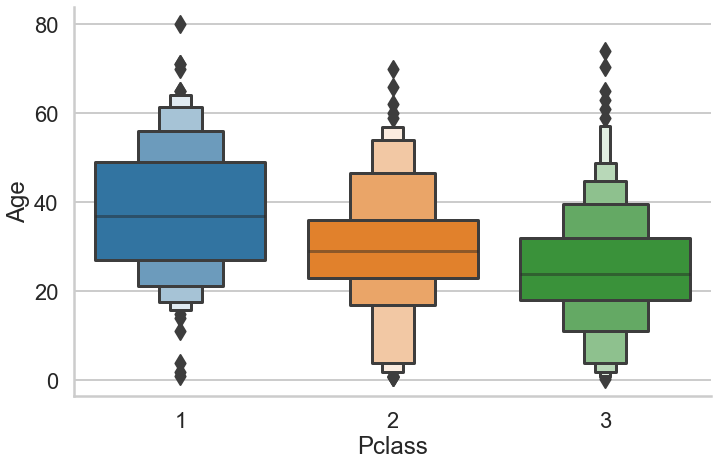

In [20]:
sns.catplot(x='Pclass', y='Age', data=df, kind='boxen',height=7, aspect=1.5);

Text(0.5, 1.05, 'Conteo por Sexo-Clase y Puerto de Embarque')

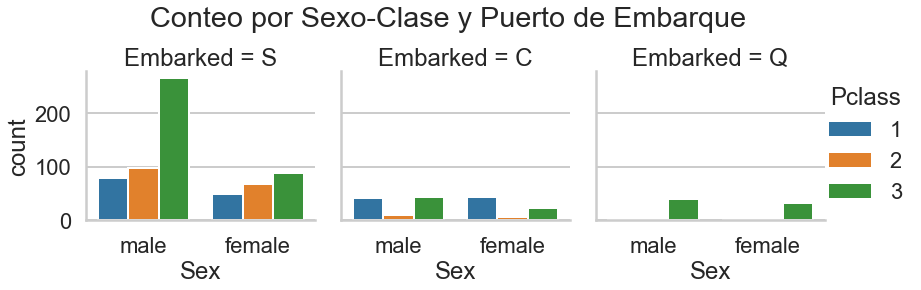

In [21]:
g = sns.catplot(x='Sex',data=df, kind = 'count', height=4, aspect = 1, hue='Pclass', col = 'Embarked')
g.fig.suptitle('Conteo por Sexo-Clase y Puerto de Embarque', y=1.05)


### Displot --- Gráficos de distribución.
[Displot doc](https://seaborn.pydata.org/generated/seaborn.displot.html)  
Necesitan una sola variable

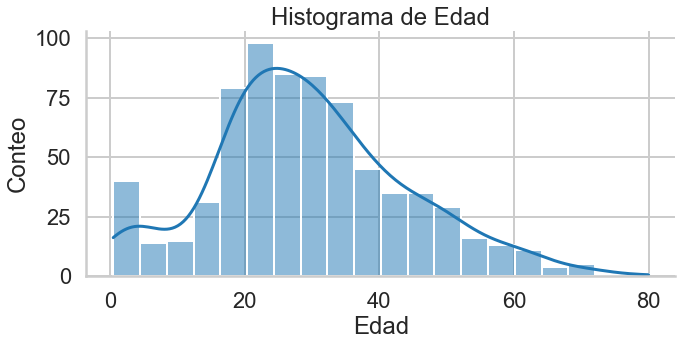

In [22]:
sns.displot(x='Age',data=df, kde=True,aspect=2) # x siempre tiene que ser numérica
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Conteo');

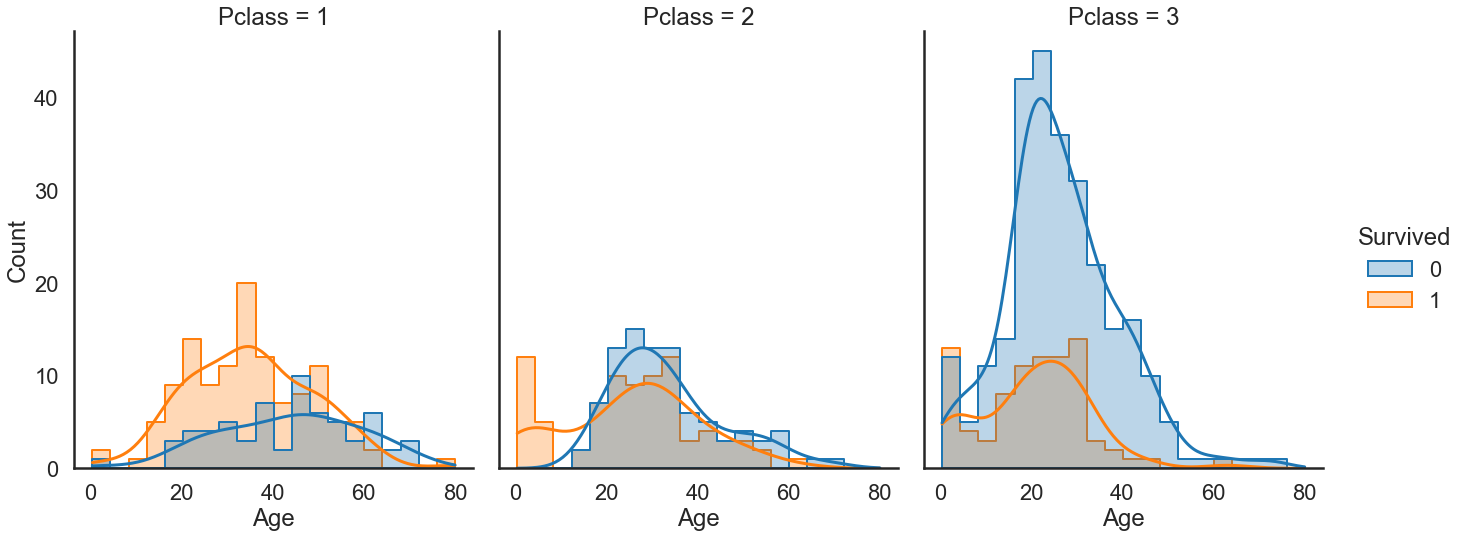

In [23]:
sns.set_style('white')  # white, dark, whitegrid, darkgrid, ticks
sns.displot(x='Age', data=df, kde=True, height=8,aspect=.8, hue='Survived', alpha=0.3, element='step', col='Pclass');


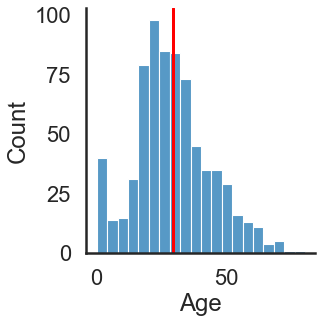

In [24]:
media = df.Age.mean()
sns.displot(x = 'Age', data=df)
plt.axvline(x = media, color='r')

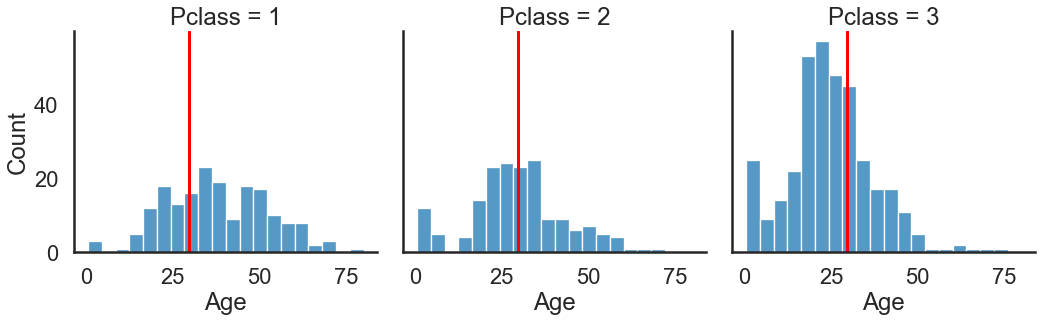

In [25]:
media = df.Age.mean()
g = sns.displot(x = 'Age', data=df, col ='Pclass')
g.map(plt.axvline, x=media, color='r')
plt.axvline(x = media, color='r')

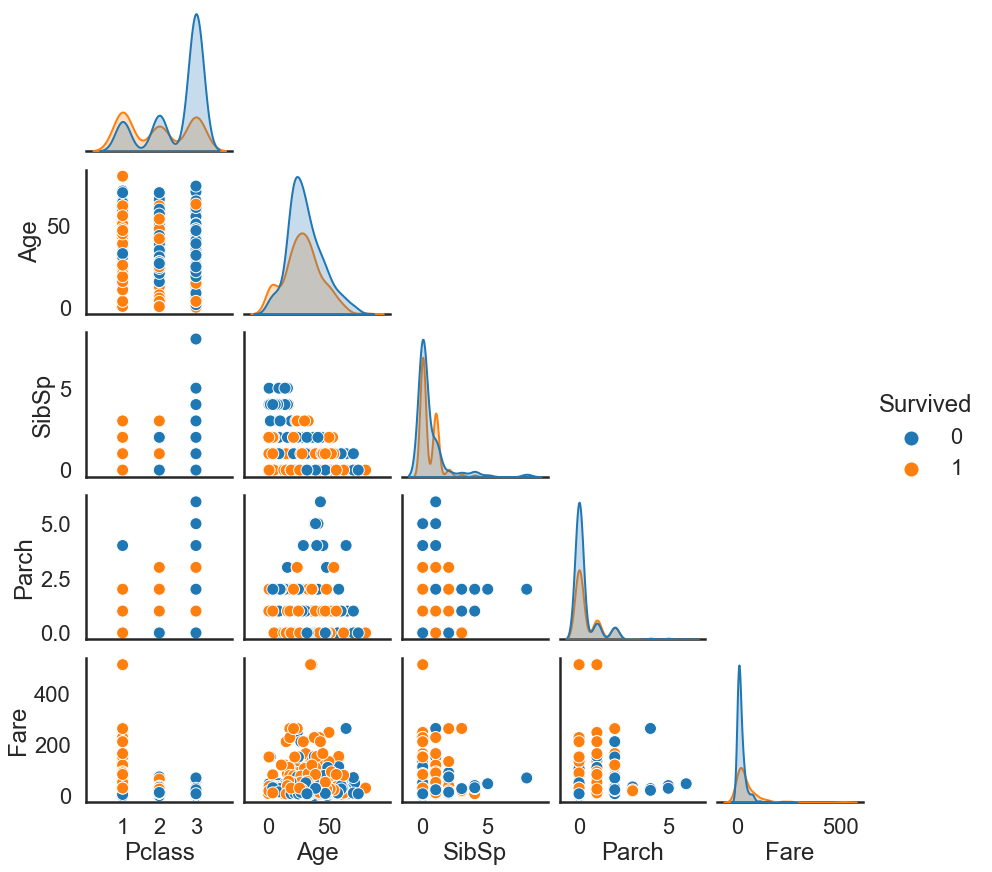

In [26]:
sns.pairplot(df.drop(['PassengerId'],axis=1), corner=True,hue='Survived', diag_kind='kde', diag_kws=dict(shade=True))


In [27]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

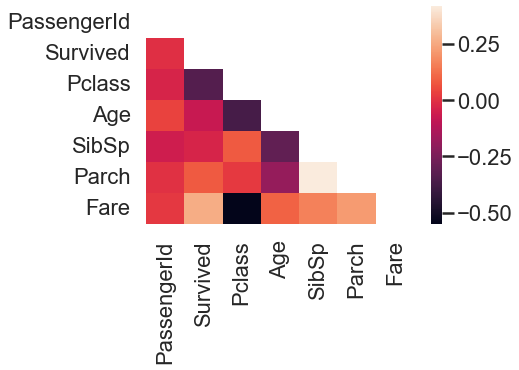

In [28]:
sns.heatmap(df.corr(),annot = False, mask = np.triu(df.corr()))

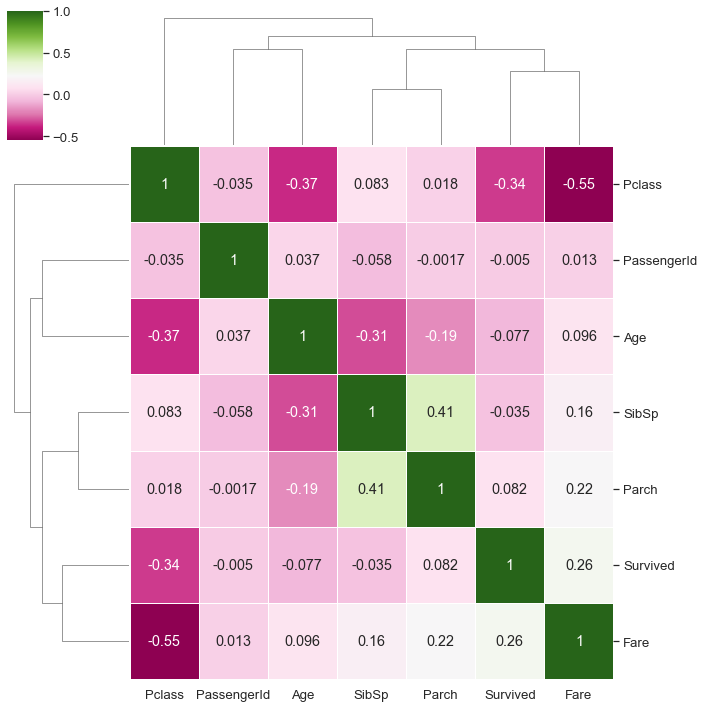

In [31]:
sns.clustermap(df.corr(), annot=True, linewidth=0.9, cmap = 'PiYG')
sns.set(font_scale=1) 

In [42]:
pd.DataFrame((np.triu(df.corr())))

,0,1,2,3,4,5,6
0,1.0,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
1,0.0,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
2,0.0,0.000000,1.000000,-0.369226,0.083081,0.018443,-0.549500
3,0.0,0.000000,0.000000,1.000000,-0.308247,-0.189119,0.096067
4,0.0,0.000000,0.000000,0.000000,1.000000,0.414838,0.159651
5,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.216225
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


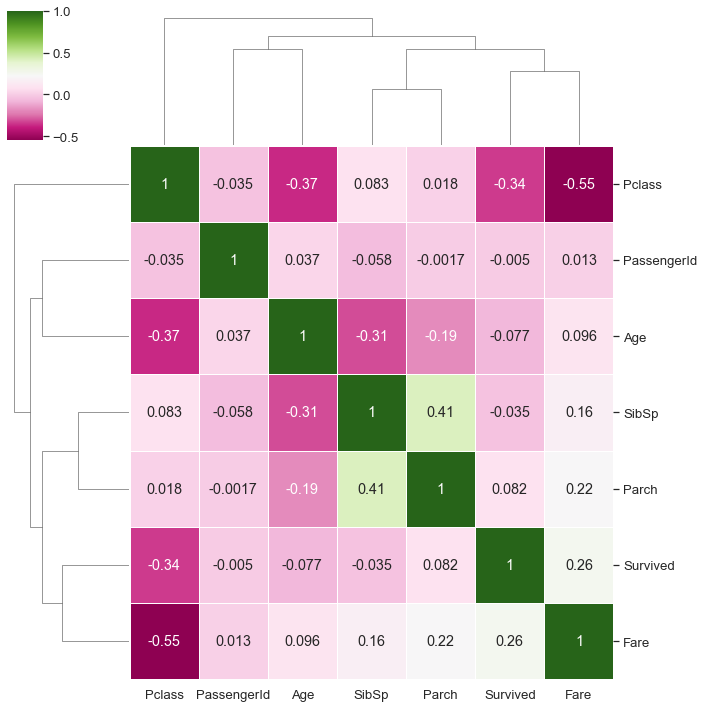

In [74]:
g = sns.clustermap(df.corr(), annot=True, linewidth=0.9, cmap='PiYG')
g.savefig('clustermap.png')


# Revisar
https://seaborn.pydata.org/nextgen/demo.html